## MDSC-103(P)  End Semester Exam

###### Author : A Aditya Bhardwaj
###### Registration Number : 22226

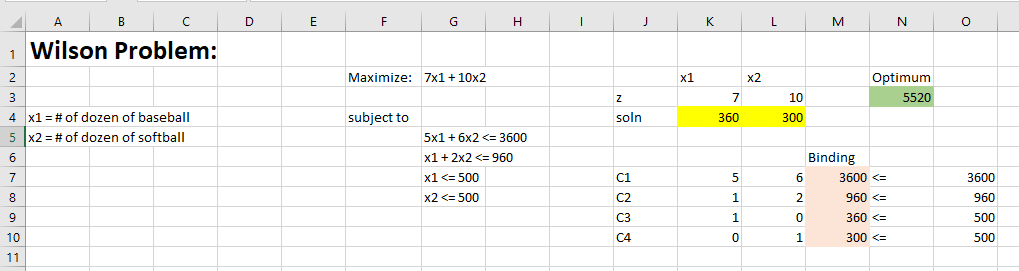

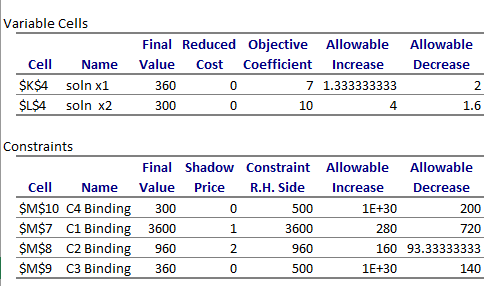

1) b Write on cost coefficient sensitivity analysis.

###### Answer
Our objective cofficient of x1 is 7 and for x2 is 10. we can decrease the coefficient of x1 by 2 units and increase it by 1.333333333 unit to get a feasible solution. Similarly we can increase the coefficient of x2 by 4 units and decrease it by 1.2 units

1) c Write on Right Hand Side Sensitivity Analysis.

###### Answer
- C1 can be increased upto 280 and decrease upto 720. The shadow price for this constraint is 1
- C2 can be increased upto 160 and decrease upto 94 or 93.33333. The shadow price for this constraint is 2
- C3 can be increased upto infinity and decrease upto 140. It has a zero shadow price 
- C4 can be increased upto infinity and decrease upto 200. It has a zero shadow price 

1) d
$$ Maximize : 7x_1+10x_2$$

subject to :
$$           5x_1 + 6x_2 <=3600
$$
$$
           x_1 + 2x_2  <= 960
$$
$$
           x_1         <= 500
$$
$$
                  x_2  <= 500
$$                  

In [25]:
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
from scipy.optimize import Bounds
import numpy as np

g = lambda x1,x2: 7*x1 + 10*x2

bounds = Bounds([0,0],[np.inf,np.inf])
linear_constraint = LinearConstraint([5,6],[1,2],[1,0],[0,1])
x0 = [0,0]
res = minimize(g, x0, constraints = linear_constraint)

C:\Users\Msc 1\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_constraints.py:368: OptimizeWarning: Constraint option `keep_feasible` is ignored by this method.
  warn("Constraint option `keep_feasible` is ignored by this "


ValueError: `keep_feasible` has a wrong shape.

2)$$Maximize :𝑓(𝑥_1,𝑥_2)=4𝑥_1+6𝑥_2−2𝑥_1^2−2𝑥_1𝑥_2−2𝑥_2^2$$

#### Visualizing the above function

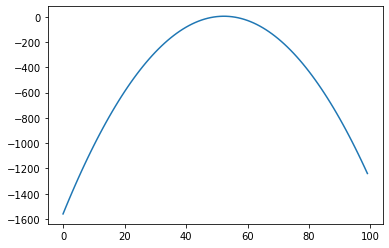

In [2]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x1,x2: 4*x1 + 6*x2 - 2*(x1**2) - 2*x1*x2 - 2*(x2**2)
a = np.linspace(-10,10,100)
b = np.linspace(-20,20,100)

plt.plot(f(a,b))

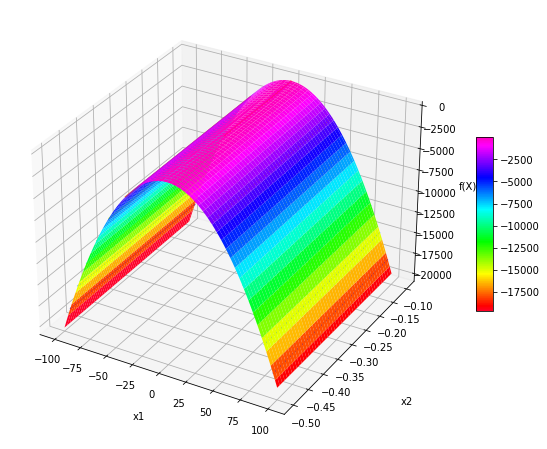

In [18]:
f = lambda x1,x2: 4*x1 + 6*x2 - 2*(x1**2) - 2*x1*x2 - 2*(x2**2)
x1 = np.linspace(-100,100,100)
x2 = np.linspace(-0.5,-0.1,100)
X, Y = np.meshgrid(x1,x2)
F = f(X,Y)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection='3d') # set up the axis as a 3D plot
surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
ax.contour(X, Y, F, cmap ='jet')
# set axes label
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)

plt.show()

#### Now we find the iterative program to solve this equation. We will use Newton Raphson method to find the solution of this problem.

In [9]:
from sympy import symbols, diff
import numpy as np 

def grad_f():
    x, y = symbols('x y', real = True)
    f = 4*x + 6*y - 2*(x**2) - 2*x*y - 2*(y**2)
    grad_f_trans = [diff(f,x),diff(f,y)]
    return np.array(grad_f_trans)

In [10]:
def jacobi():        #takes grad_f_trans as an input
    gf = grad_f()
    x, y = symbols('x y', real = True)
    j_matrix = [[diff(gf[0],x), diff(gf[0],y)],[diff(gf[1],x), diff(gf[1],y)]]
    return np.array(j_matrix)

In [11]:
def N_R_Method():    #takes j_matrix as an input
    x0 = np.array([-1,-1])
    gf_trans = grad_f()
    jacobi_M = jacobi()
    x, y = symbols('x y', real = True)
    jacobi_M = [[jacobi_M[0][0].subs(x, x0[0]).subs(y, x0[1]), 
                 jacobi_M[0][1].subs(x,x0[0]).subs(y,x0[1])],
                [jacobi_M[1][0].subs(x,x0[0]).subs(y,x0[1]),
                 jacobi_M[1][1].subs(x,x0[0]).subs(y,x0[1])]]
    
    jacobi_M = np.array(jacobi_M)
    jacobi_M = np.float64(jacobi_M)
    jacobi_M_inv = np.linalg.inv(jacobi_M)
    
    e = 1
    while(e > 0.00001):
        x, y = symbols('x y', real = True)
        g_x0 = [gf_trans[0].subs(x,x0[0]).subs(y,x0[1]),
                gf_trans[1].subs(x,x0[0]).subs(y,x0[1])]
        g_x0 = np.array(g_x0)
        x1 = np.subtract(x0,np.matmul(jacobi_M_inv, g_x0))
        m = np.linalg.norm(np.array(x0, dtype=float))
        n = np.linalg.norm(np.array(x1, dtype=float))
        e = m-n
        x0 = x1
    return x0

In [12]:
ans = N_R_Method()
ans

array([0.333333333333333, 1.33333333333333], dtype=object)